# Author : Ahmed Khaled

### The Sparks Foundation Data Science Internship
- Exploratoy Analysis on the Global Terrorism dataset.

### *************************************************************************************

## Solution Roadmap
1. Importing the necessary packages
2. Loading the dataset
3. Descriptive statistics
4. Visualizing the dataset

In [110]:
import numpy as np  # for Linear Algebra Manipulation
import pandas as pd  # for dataframe Manipulation
import matplotlib.pyplot as plt  # for Data Visualization
from mpl_toolkits.basemap import Basemap
import warnings

warnings.filterwarnings('ignore')

- Reading the data
- Renaming the columns to suit our analysis
<!-- - Creating the casualities column which is the sum of killed  and wonded people -->

In [111]:
df = pd.read_csv('globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')

df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country',
                        'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                        'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                        'weaptype1_txt':'Weapon_type','motive':'Motive'}, inplace=True)

df = df[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]


df.head(3)

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN


### Some Descriptive Statistics
- df.info()  for some information about the dataset
- df.shape  To show how many rows and columns are in the dataset.
- df.describe()  (numerical columns) for the mean and the 3 quartiles of each column and also the max and min values in each column.
- df.describe()  (categorical columns) for the count, uniue, top and freq 
- df.isnull().sum()  To see if there is any missing values in the dataset.
- df.skew()  To see how the data is skewed.

In [112]:
df.shape  # The shape of the dataset.

(181691, 17)

In [113]:
df.info()  # Some Info about the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   city         181257 non-null  object 
 6   latitude     177135 non-null  float64
 7   longitude    177134 non-null  float64
 8   AttackType   181691 non-null  object 
 9   Killed       171378 non-null  float64
 10  Wounded      165380 non-null  float64
 11  Target       181055 non-null  object 
 12  Summary      115562 non-null  object 
 13  Group        181691 non-null  object 
 14  Target_type  181691 non-null  object 
 15  Weapon_type  181691 non-null  object 
 16  Motive       50561 non-null   object 
dtypes: float64(4), int64(3), object(10)
memory usage: 23.6+ MB


In [114]:
df.select_dtypes(exclude='object').describe()  # Describe for numerical Columns.

,Year,Month,Day,latitude,longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [115]:
df.select_dtypes(exclude=['int64', 'float64']).describe()  # Describe for Categorical Columns

,Country,Region,city,AttackType,Target,Summary,Group,Target_type,Weapon_type,Motive
count,181691,181691,181257,181691,181055,115562,181691,181691,181691,50561
unique,205,12,36674,9,86006,112492,3537,22,12,14490
top,Iraq,Middle East & North Africa,Unknown,Bombing/Explosion,Civilians,"09/00/2016: Sometime between September 18, 201...",Unknown,Private Citizens & Property,Explosives,Unknown
freq,24636,50474,9775,88255,6461,100,82782,43511,92426,14889


In [116]:
df.isnull().sum()  # how many null values in each column

Year                0
Month               0
Day                 0
Country             0
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

# **Exploratory Data Analysis** Based on
- the Number  of events each year
- Region
- Countries
- Attacking Types
- Groups who did the event.

- We can easily see how the nuber of events are rising.
- South Asia, Middle East & North Africa are highest regions with events.
- Iraq, Pakistan, Afghanistan, India and Colombia are the highet 5 countries with events.
- Taliban, Islamic State of Iraq and Levant(ISIL), Shining Path are the top 3 Groups.
- Bombing/Explosion, Armed Assault and Assassination are the top three Attacking types.
- Private Citizens&Property, Military, Police, Govermmet(General) and Business

<AxesSubplot: >

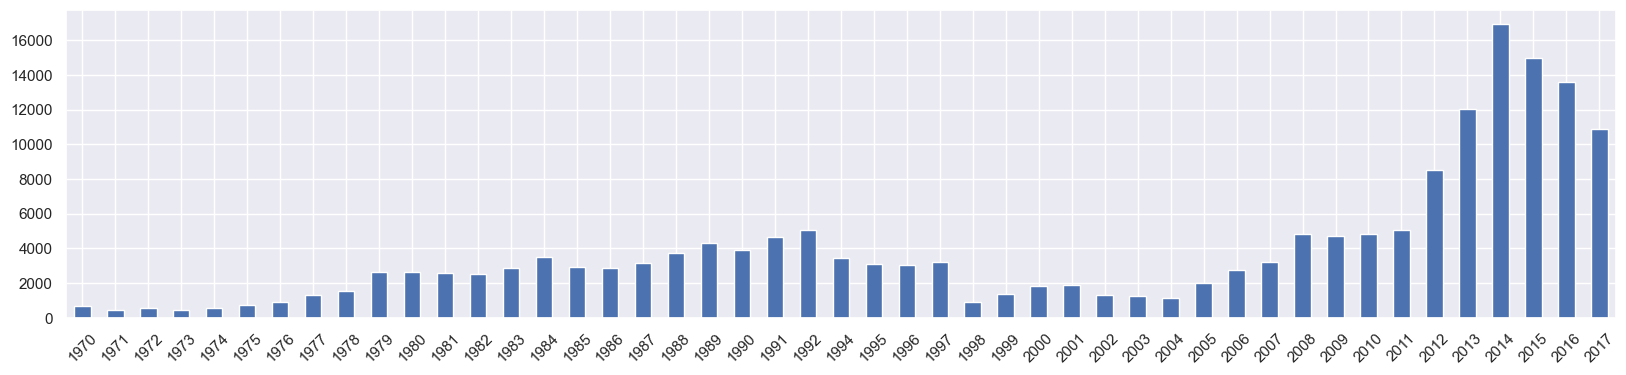

In [117]:
df['Year'] = df['Year'].astype('object')  # - converting the dtype from int64 to object to enable the counting.

df['Year'].value_counts().sort_index().plot(rot=45, kind='bar')  # - counting the number of events happened each year 

<AxesSubplot: >

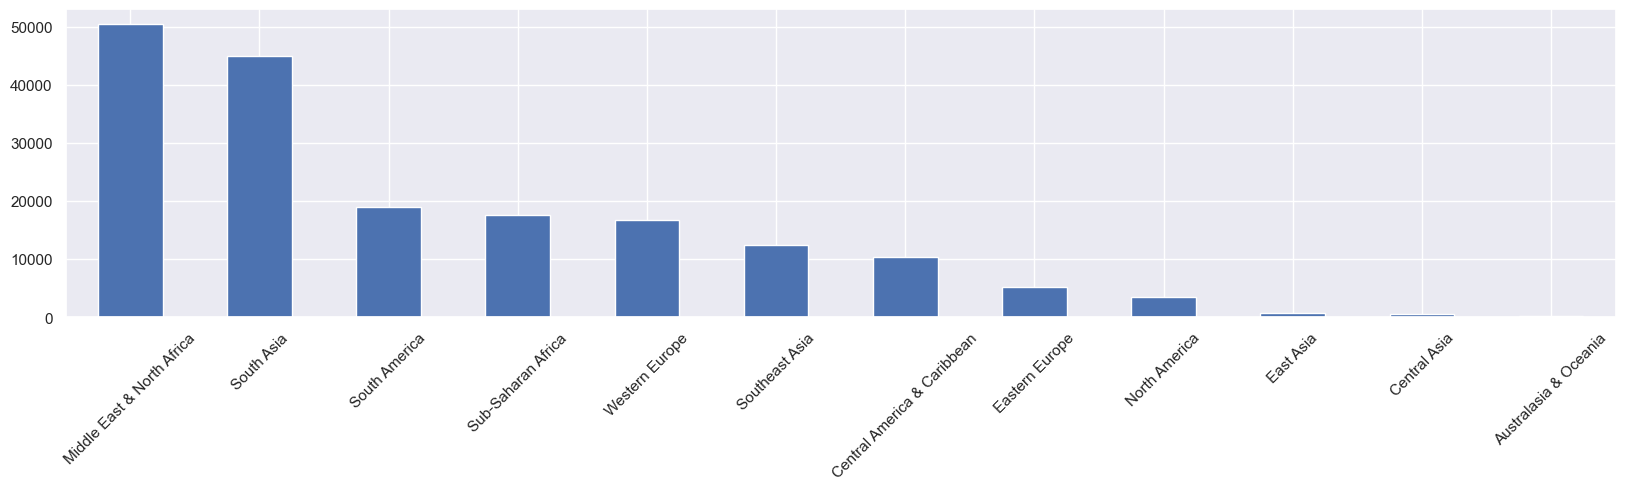

In [118]:
df['Region'].value_counts().plot(rot=45, kind='bar')  # - counting the number of events happened each year 

<AxesSubplot: >

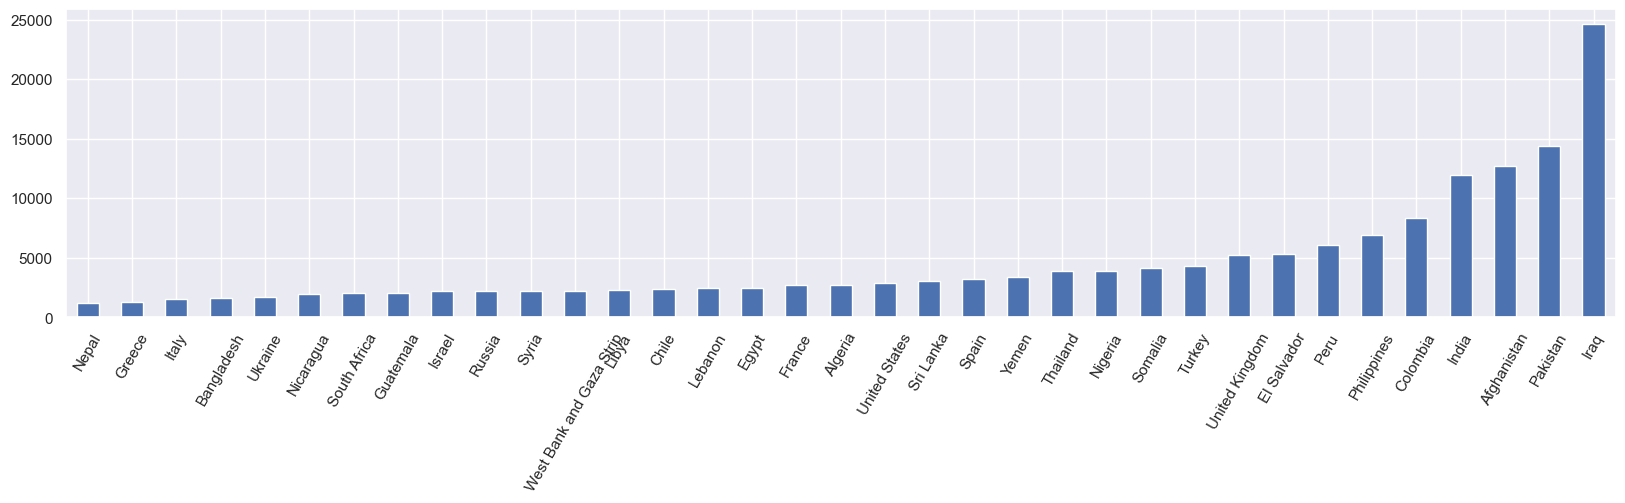

In [119]:
df['Country'].value_counts()[:35].sort_values().plot(rot=60, kind='bar')  # - counting the number of events happened each year 

<AxesSubplot: >

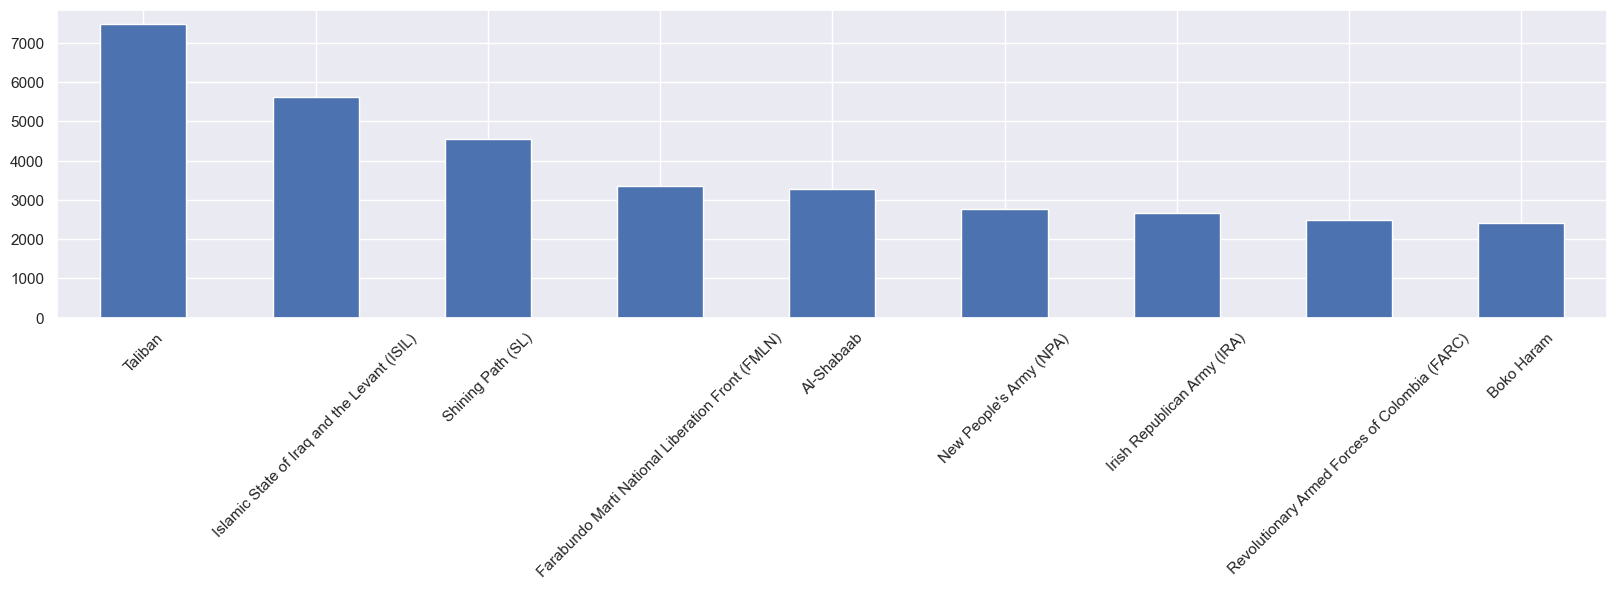

In [120]:
df['Group'].value_counts()[1:10].plot(rot=45, kind='bar')  # - counting the number of events happened each year 

<AxesSubplot: >

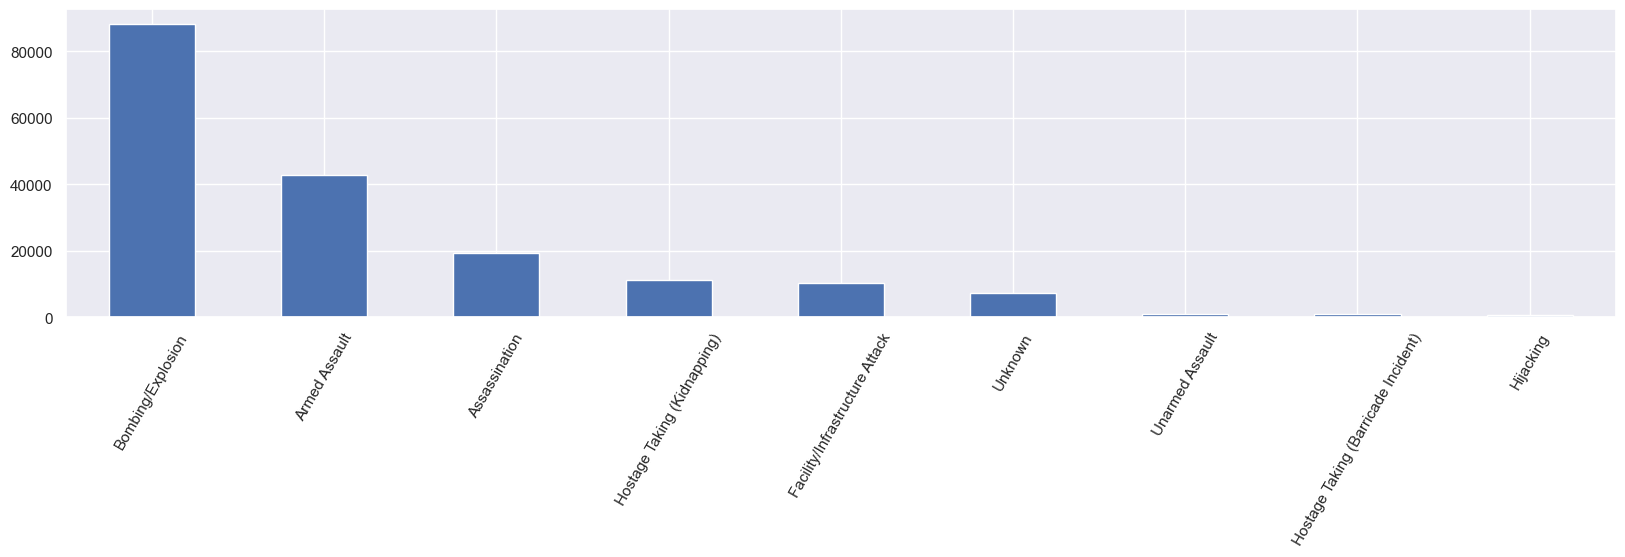

In [121]:
df['AttackType'].value_counts().plot(rot=60, kind='bar')  # - counting the number of events happened each year 

<AxesSubplot: >

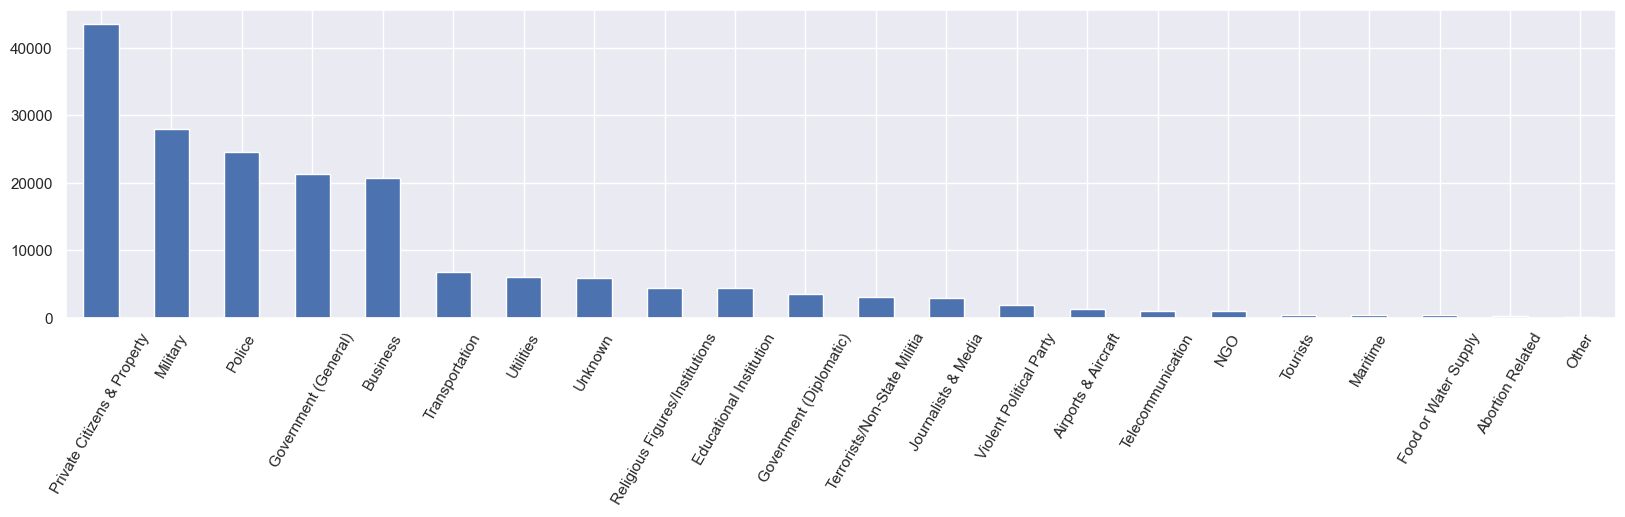

In [122]:
df['Target_type'].value_counts().plot(rot=60, kind='bar')  # - counting the number of events happened each year 

### Visualizing the KIlled and wounded people

- The number of killed has increased over the last 10 years
- Same thing with the wounded has increased over the last 10 years

<AxesSubplot: xlabel='Year'>

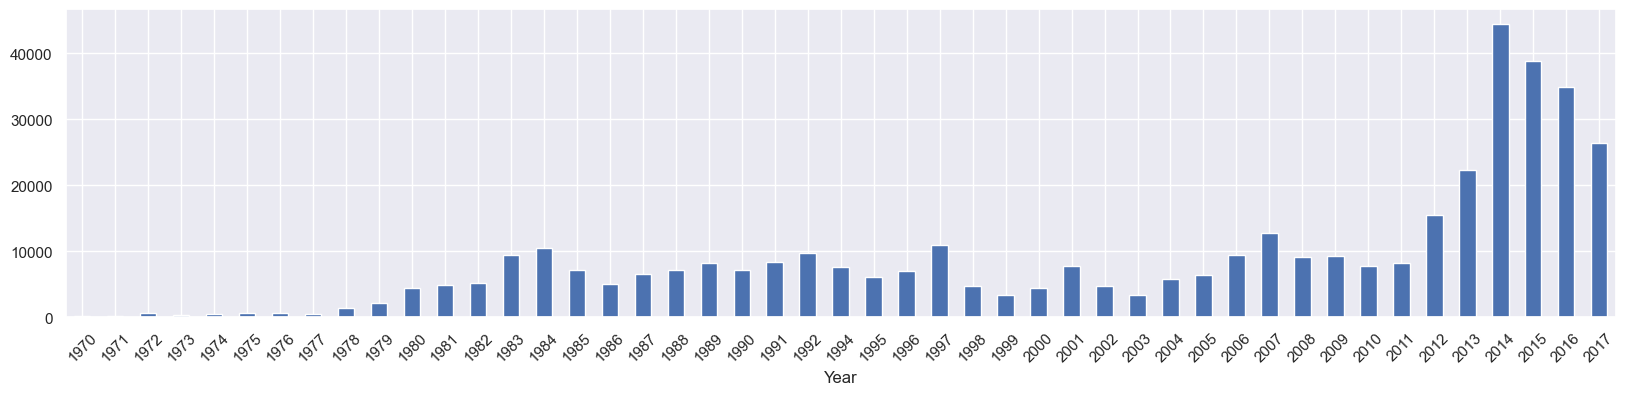

In [123]:
df.groupby('Year')['Killed'].agg('sum').plot(kind='bar', rot=45)

<AxesSubplot: xlabel='Year'>

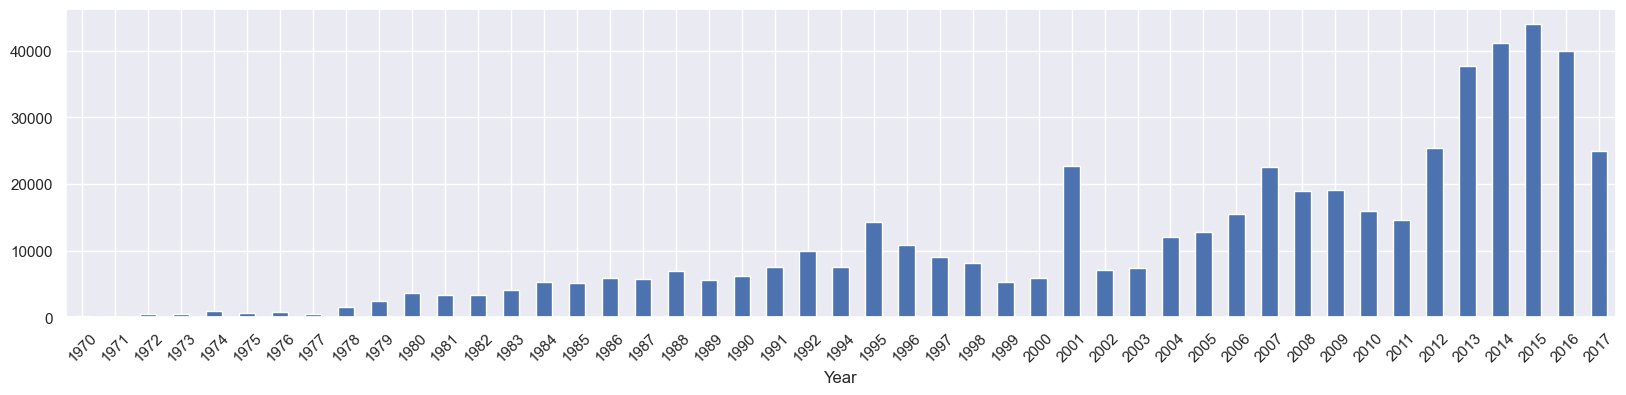

In [124]:
df.groupby('Year')['Wounded'].agg('sum').plot(kind='bar', rot=45)

- **Adding the Casualities column which is the sum between the Killed and Wounded People.**
- Group data by Group column to see which group is accused of more Casualities.

In [125]:
df['Casualities'] = df['Killed'] + df['Wounded']

<AxesSubplot: xlabel='Group'>

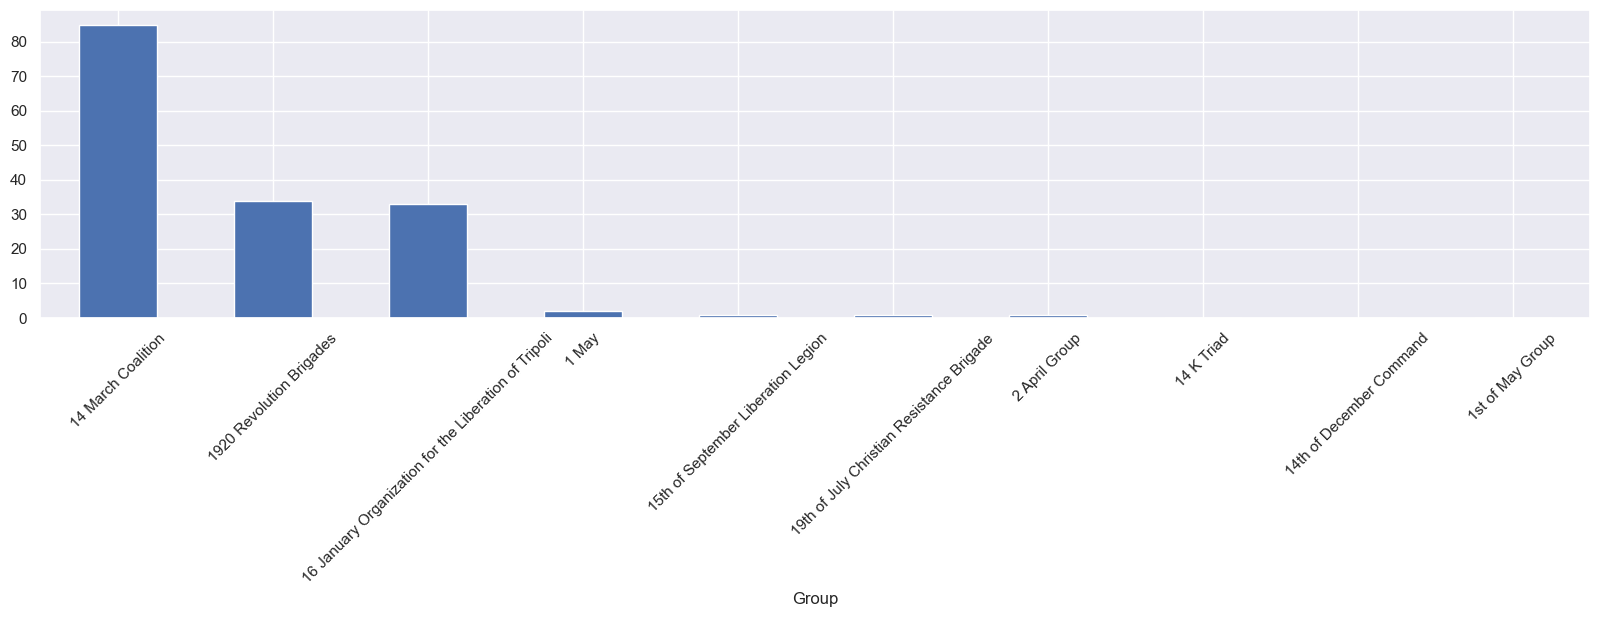

In [126]:
df.groupby('Group')['Casualities'].agg('sum')[:10].sort_values(ascending=False).plot(kind='bar', rot=45)

- Plotting each event longitude and latitude on the map

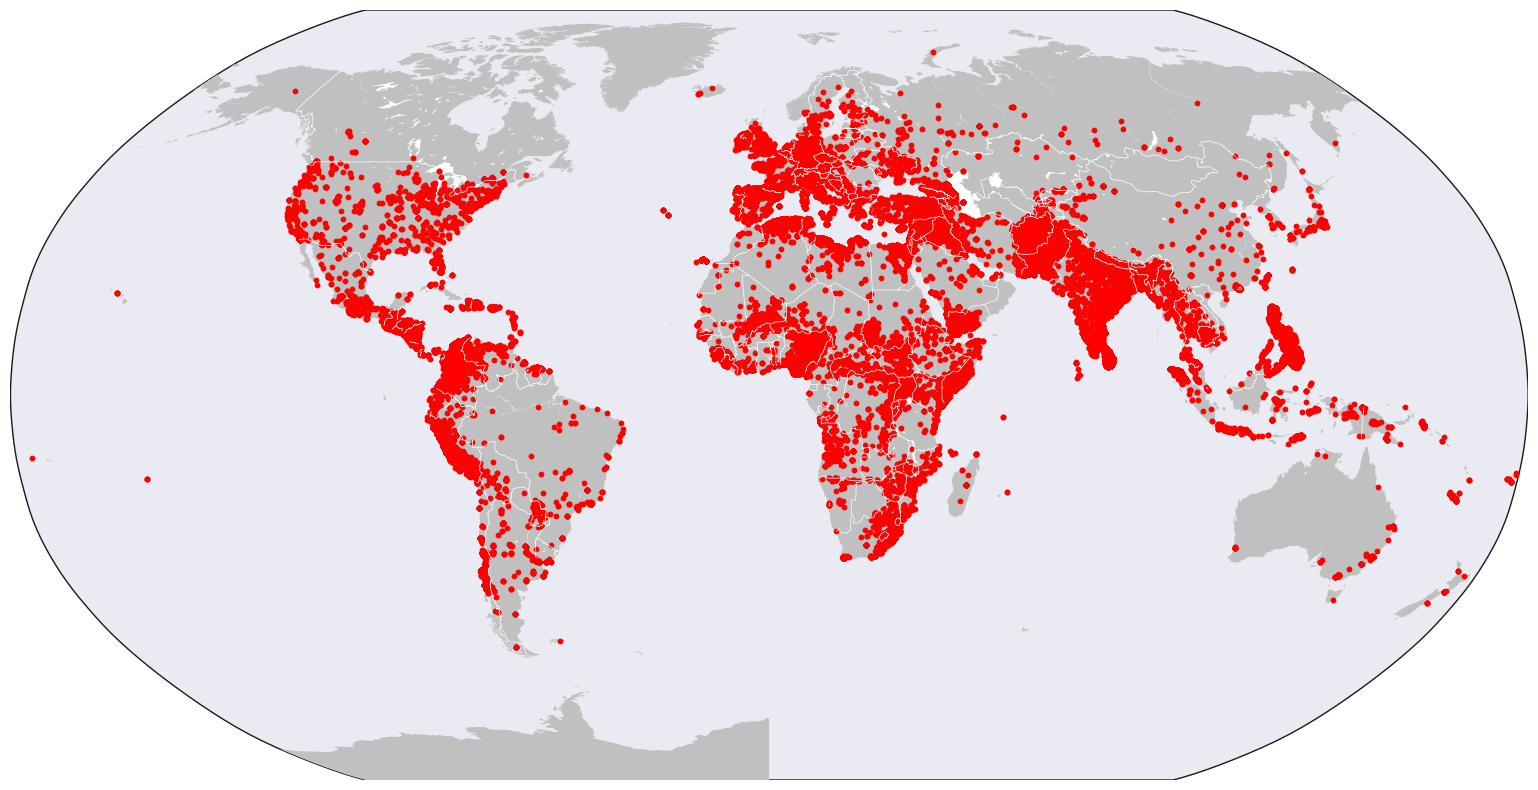

In [127]:
plt.figure(figsize=(20, 10))


m = Basemap(projection='robin', lon_0=0, resolution='l')

# New York and Berlin
lats = df['latitude']
lons = df['longitude']

m.drawcountries(color='#ffffff', linewidth=0.5)
m.fillcontinents(color='#c0c0c0', lake_color='#ffffff')

x, y = m(lons, lats)  # transform coordinates
plt.scatter(x, y, 10, marker='o', color='Red') 

# plt.savefig("filename.svg", figsize=(24,12))
plt.show()